# Отчет по интро-задаче

## Описание датасета
В файле вас ждет датасет для интро-задачи.<br/>
В датасете представлен один рабочий день пиццерии.
 
### Столбцы таблицы продуктов: 
Начали принимать заказ — время начала приема заказа;<br/>
Закончили принимать заказ — время окончания приема заказа;<br/>
Повезли клиенту / выдали в руки – время, когда заказ был упакован и передан курьеру или клиенту в ресторане;<br/>
OrderId — идентификатор заказа;<br/>
OrderType – тип продажи. Заказы могут быть проданы в ресторане и отвезены на доставку;<br/>
ProductId — идентификатор продукта;<br/>
ProductPrice – цена продукта;<br/>
CategoryId — категория продукта;<br/>
ClientId — идентификатор клиента;<br/>
IsBaked — признак выпекаемый ли продукт;<br/>
<br/>
### Вспомогательные данные:
CategoryId == 1, ‘Пицца’,<br/>
    	CategoryId == 2, ‘Напитки’,<br/>
    	CategoryId == 3, ‘Закуски’,<br/>
    	CategoryId == 4, ‘Соусы’,<br/>
    	CategoryId == 5, ‘Товары’,<br/>
    	CategoryId == 6, ‘Десерты’,<br/>
    	CategoryId == 7, ‘Кусочки пиццы’<br/>

## Ваша задача:
Мы в компании работаем над  повышением лояльности клиентов. <br/>
В датасете представлен один рабочий день пиццерии.
1. Расскажите, что происходило в этот день.
1. Подумайте, как можно повысить лояльность клиентов.
1. Дайте знать, если вам не хватает данных, и что бы вы добавили и еще проанализировали.


# Решение:
__Интересная задачка. Спасибо!<br/>
Я просмотрел глазами датасет и увидел в нем логи обслуживания заказов клиентов.<br/> 
Каких-то других данных, например, результатов сбора Net Promoter Score в датасете нет.<br/>
Значит я буду измерять не лояльность, а метрики (kpi) обработки запросов клиентов.<br/>
<br/>
Как эти метрики связаны с лояльностью? <br/>
Метрики эти влияют на удовлетворенность клиентов обслуживанием. <br/>
А удовлетворенность в свою очередь уже влияет на лояльность клиента к компании. <br/>__
<br/>
## Ход моих мыслей будет таким:
__Пиццерия - это по сути система массового обслуживания. <br/>
Двигаюсь от общего к частному:<br/>
Пиццерия - она как весы Фемиды. **На одной чаше нагрузка**. **На другой чаше ресурсы**, которую эту нагрузку обрабатывают. <br/> 
На одну чашу каждый час кладут какую-то нагрузку. На другую чашу коллектив пиццерии бросает свою производительность.<br/>
Если где-то есть перекос, то эго можно будет увидеть в цифрах. В таблицах и на
графиках.<br/>
Буду делать выводы на основе данных.<br/>__

In [1]:
# Начинаю анализировать данные.

# Импортирую необходимые библиотеки
import pandas as pd
import seaborn as sns
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,5)}
        )
import matplotlib.pyplot as plt
%matplotlib inline 
# У меня большой монитор и мне удобно использовать его во всю ширину. Поэтому:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.expand_frame_repr = False
pd.options.display.max_columns = None # display(df)
pd.options.display.max_rows = None

In [2]:
# Загружаю датасет:
path_to_file_intro = './ERP_Intro.csv'
intro_data = pd.read_csv(path_to_file_intro)
# Нужно привести названия колонок в удобный вид:
intro_data.rename(columns={'Начали принимать заказ':'processing_start'}, inplace=True)
intro_data.rename(columns={'Закончили принимать заказ':'processing_stop'}, inplace=True)
intro_data.rename(columns={'Повезли клиенту / выдали в руки':'out_from_reception'}, inplace=True)
intro_data = intro_data.rename(str.lower, axis='columns')
# Преобразовываю типы данных для пригодности к вычислениям
intro_data['processing_start'] = pd.to_datetime(intro_data.processing_start)
intro_data['processing_stop'] = pd.to_datetime(intro_data.processing_stop)
intro_data['out_from_reception'] = pd.to_datetime(intro_data.out_from_reception)
intro_data['clientid'] = intro_data['clientid'].fillna(0).astype('int64', errors='raise')
# Добавляю в датасет время приема заказа
intro_data['processing_time'] = intro_data['processing_stop'] - intro_data['processing_start']
# Добавляю время глазами клиента: от момента начала заказа до удовлетворения запроса (получения всех составляющих заказа)
intro_data['time_to_complete'] = intro_data['out_from_reception'] - intro_data['processing_start']
# Буду квантовать данные по часу дня. 
intro_data['order_hour'] = intro_data['processing_start'].dt.hour
# Люблю просматривать данные глазами.
intro_data.sort_values(by='orderid', ascending=True).head(10)

,orderid,ordertype,processing_start,processing_stop,out_from_reception,productid,categoryid,isbaked,productprice,clientid,processing_time,time_to_complete,order_hour
1065,642483792,Delivery,2022-02-02 04:54:40,2022-02-02 04:54:40,2022-02-02 17:39:56,36489,5,0,10,10925942,0 days,0 days 12:45:16,4
1125,642483792,Delivery,2022-02-02 04:54:40,2022-02-02 04:54:40,2022-02-02 17:39:56,285,1,1,314,10925942,0 days,0 days 12:45:16,4
1005,642483792,Delivery,2022-02-02 04:54:40,2022-02-02 04:54:40,2022-02-02 17:39:56,252,0,0,343,10925942,0 days,0 days 12:45:16,4
45,642483792,Delivery,2022-02-02 04:54:40,2022-02-02 04:54:40,2022-02-02 17:39:56,252,1,1,343,10925942,0 days,0 days 12:45:16,4
1245,642483792,Delivery,2022-02-02 04:54:40,2022-02-02 04:54:40,2022-02-02 17:39:56,4842,0,0,342,10925942,0 days,0 days 12:45:16,4
1185,642483792,Delivery,2022-02-02 04:54:40,2022-02-02 04:54:40,2022-02-02 17:39:56,285,0,0,314,10925942,0 days,0 days 12:45:16,4
1305,642483792,Delivery,2022-02-02 04:54:40,2022-02-02 04:54:40,2022-02-02 17:39:56,4842,1,1,342,10925942,0 days,0 days 12:45:16,4
749,642494272,Delivery,2022-02-02 06:47:03,2022-02-02 06:47:03,2022-02-02 18:05:22,18,1,1,639,31799916,0 days,0 days 11:18:19,6
869,642494272,Delivery,2022-02-02 06:47:03,2022-02-02 06:47:03,2022-02-02 18:05:22,36489,5,0,10,31799916,0 days,0 days 11:18:19,6
929,642494272,Delivery,2022-02-02 06:47:03,2022-02-02 06:47:03,2022-02-02 18:05:22,129,1,1,699,31799916,0 days,0 days 11:18:19,6


In [3]:
# Посмотрю - хорошо ли я причесал датафрейм
dataset = intro_data

print ('Размеры датафрейма:')
print (dataset.shape)
print (' ')
print (' ')
print ('Типы колонок датафрейма:')
print (dataset.dtypes)
print (' ')
print (' ')
print ('Количество пропущенных значений в колонках:')
print (dataset.isnull().sum())
print (' ')
print (' ')
print ('Количество уникальных заказов:')
print (dataset.orderid.nunique())
print (' ')
print (' ')
print ('Количество известных уникальных клиентов:')
print (dataset.clientid.nunique() - 1)
print (' ')
print (' ')
print ('Количество заказов от авторизованных клиентов:')
print (dataset.query("clientid != 0").orderid.nunique())
print (' ')
print (' ')
print ('Количество заказов от НЕавторизованных клиентов:')
print (dataset.query("clientid == 0").orderid.nunique())
print (' ')
print (' ')
print ('Время приема заказа в Ресторане:')
print ('min: ',dataset.query("ordertype == 'Restaurant'").processing_time.min())
print ('avg: ',dataset.query("ordertype == 'Restaurant'").processing_time.mean())
print ('max: ',dataset.query("ordertype == 'Restaurant'").processing_time.max())
print (' ')
print ('Время приема заказа на доставку:')
print ('min: ',dataset.query("ordertype == 'Delivery'").processing_time.min())
print ('avg: ',dataset.query("ordertype == 'Delivery'").processing_time.mean())
print ('max: ',dataset.query("ordertype == 'Delivery'").processing_time.max())
print (' ')
print (' ')
print ('Теперь мне интересно узнать: Есть ли такие заказы, где время выдачи товаров разное в рамках одного заказа?')
dataset_1 = intro_data
dataset_1['min_time_to_complete'] = dataset_1['time_to_complete']
dataset_1['max_time_to_complete'] = dataset_1['time_to_complete']
dataset_1
dataset_1 = dataset_1\
                    .groupby('orderid', as_index=False) \
                    .agg({'min_time_to_complete': 'min','max_time_to_complete': 'max'})

dataset_1['compare'] = dataset_1['min_time_to_complete'] == dataset_1['max_time_to_complete']
display(dataset_1.query("compare != True"))

Размеры датафрейма:
(4346, 13)
 
 
Типы колонок датафрейма:
orderid                         int64
ordertype                      object
processing_start       datetime64[ns]
processing_stop        datetime64[ns]
out_from_reception     datetime64[ns]
productid                       int64
categoryid                      int64
isbaked                         int64
productprice                    int64
clientid                        int64
processing_time       timedelta64[ns]
time_to_complete      timedelta64[ns]
order_hour                      int64
dtype: object
 
 
Количество пропущенных значений в колонках:
orderid               0
ordertype             0
processing_start      0
processing_stop       0
out_from_reception    0
productid             0
categoryid            0
isbaked               0
productprice          0
clientid              0
processing_time       0
time_to_complete      0
order_hour            0
dtype: int64
 
 
Количество уникальных заказов:
891
 
 
Количество извес

,orderid,min_time_to_complete,max_time_to_complete,compare


__Нет таких заказов. Видимо, в системе все позиции заказа проводятся временем выдачи последней позиции.<br/>__
<br/>
<br/>
## Начинаю исследовать нагрузку:

__Я округляю время заказа до начала часа, в котором была начата обработка заказа.<br/>
И формирую таблицу, в которой для каждого часа подсчитаны:<br/>__
1. __общее количество заказов ( total_orders ),<br/>__
1. __заказов в ресторане ( resaurant_orders ),<br/>__
1. __заказов на доставку ( delivery_orders ). <br/>__

,order_hour,resaurant_orders,delivery_orders,total_orders
15,4,0,1,1
16,6,0,1,1
17,7,0,4,4
0,8,6,5,11
1,9,25,7,32
2,10,44,22,66
3,11,46,22,68
4,12,65,28,93
5,13,46,30,76
6,14,49,28,77


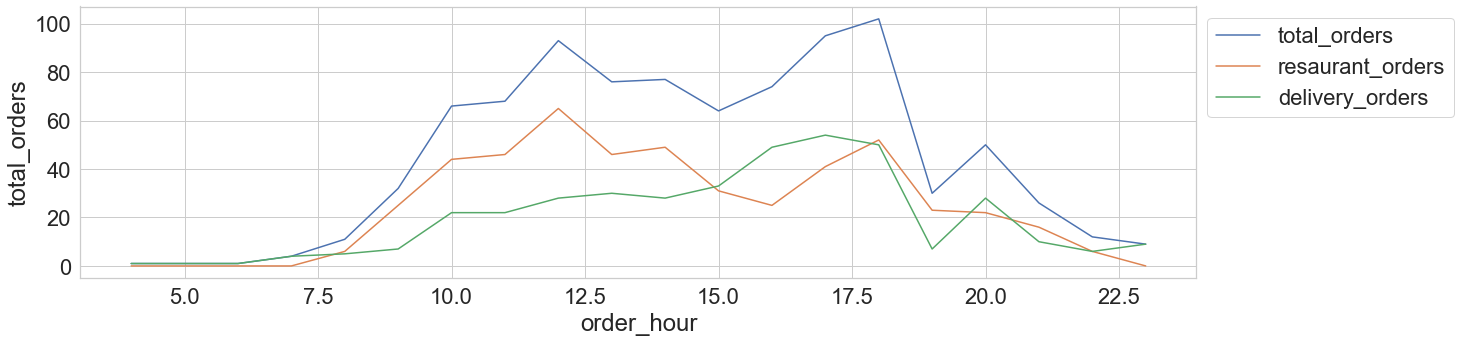

In [4]:
volume_resaurant_orders = intro_data\
.query("ordertype == 'Restaurant'")\
.drop_duplicates(subset=['orderid'])\
.groupby('order_hour', as_index=False) \
.agg({'orderid': 'count'})
volume_resaurant_orders.rename(columns={'orderid':'resaurant_orders'}, inplace=True)
#display(volume_resaurant_orders)

volume_delivery_orders = intro_data\
.query("ordertype == 'Delivery'")\
.drop_duplicates(subset=['orderid'])\
.groupby('order_hour', as_index=False) \
.agg({'orderid': 'count'})
volume_delivery_orders.rename(columns={'orderid':'delivery_orders'}, inplace=True)
#display(volume_delivery_orders)

volume_all_orders = volume_resaurant_orders.merge(volume_delivery_orders[['order_hour','delivery_orders']], how='outer', on=['order_hour'])
volume_all_orders = volume_all_orders.fillna(0).astype('int64', errors='raise').sort_values(by='order_hour', ascending=True)
volume_all_orders['total_orders'] = volume_all_orders['resaurant_orders'] + volume_all_orders['delivery_orders']
display(volume_all_orders.sort_values(by='order_hour', ascending=True))

plt.figure(figsize=(20, 5))
sns.lineplot(data=volume_all_orders, x="order_hour", y="total_orders")
sns.lineplot(data=volume_all_orders, x="order_hour", y="resaurant_orders")
sns.lineplot(data=volume_all_orders, x="order_hour", y="delivery_orders")
plt.legend(labels=["total_orders","resaurant_orders","delivery_orders"], loc = 2, bbox_to_anchor = (1,1))


__Окей. С распределением нагрузки понятно. Ниже я буду сопоставлять графики и опишу подробности.<br/>__
<br/>
## Начинаю исследовать производительность ресурсов:<br/>
__По датасету сразу бросается в глаза что:<br/>__
1. __Есть клиенты, которые приходят ногами в ресторан, а есть клиенты, которые заказывают доставку. <br/>__
1. __Для клиентов в ресторане мы видим весь путь запроса от начала оформления до удовлетворения(выдача клиенту)<br/>__
1. __Для заказов с доставкой в данном датасете не хватает двух промежутков: <br/>__
    1. __сколько по времени длится оформление заказа;<br/>__
    1. __сколько по времени длится доставка после выдачи курьеру до получения заказа клиентом.<br/>__

### Начну с заказов в Ресторане. 

__По ним Виден весь путь от начала оформления запроса до его удовлетворения:<br/>__

,order_hour,avg_processing_time_total,avg_time_to_complete_total,avg_processing_time_restaurant,avg_time_to_complete_restaurant,avg_processing_time_delivery,avg_time_to_complete_delivery
0,4,0,45916,0,0,0,45916
1,6,0,40699,0,0,0,40699
2,7,0,6099,0,0,0,6099
3,8,10,2704,18,148,0,5770
4,9,31,1272,40,394,0,4410
5,10,24,1376,36,696,0,2737
6,11,24,1750,36,873,0,3583
7,12,19,1722,27,865,0,3712
8,13,20,2651,34,836,0,5435
9,14,18,1950,28,747,0,4055


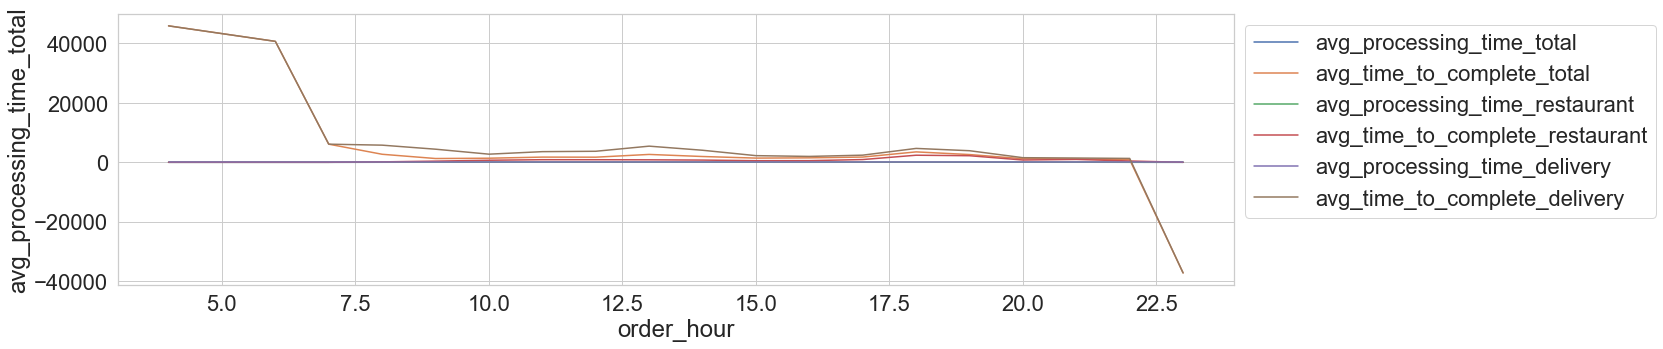

In [5]:
avg_time_all = intro_data\
    .groupby(['orderid','order_hour'], as_index=False) \
    .agg({'processing_time': 'max','time_to_complete': 'max'})\
    .groupby('order_hour', as_index=False) \
    .agg({'processing_time': 'mean','time_to_complete': 'mean'})
avg_time_all['processing_time'] = round(avg_time_all.processing_time.dt.total_seconds())
avg_time_all['time_to_complete'] = round(avg_time_all.time_to_complete.dt.total_seconds())
avg_time_all.rename(columns={'processing_time':'avg_processing_time_total'}, inplace=True)
avg_time_all.rename(columns={'time_to_complete':'avg_time_to_complete_total'}, inplace=True)
#display(avg_time_all)

avg_time_restaurant = intro_data\
    .query("ordertype == 'Restaurant'")\
    .groupby(['orderid','order_hour'], as_index=False) \
    .agg({'processing_time': 'max','time_to_complete': 'max'})\
    .groupby('order_hour', as_index=False) \
    .agg({'processing_time': 'mean','time_to_complete': 'mean'})
avg_time_restaurant['processing_time'] = round(avg_time_restaurant.processing_time.dt.total_seconds())
avg_time_restaurant['time_to_complete'] = round(avg_time_restaurant.time_to_complete.dt.total_seconds())
avg_time_restaurant.rename(columns={'processing_time':'avg_processing_time_restaurant'}, inplace=True)
avg_time_restaurant.rename(columns={'time_to_complete':'avg_time_to_complete_restaurant'}, inplace=True)
#display(avg_time_restaurant)

avg_time_delivery = intro_data\
    .query("ordertype == 'Delivery'")\
    .groupby(['orderid','order_hour'], as_index=False) \
    .agg({'processing_time': 'max','time_to_complete': 'max'})\
    .groupby('order_hour', as_index=False) \
    .agg({'processing_time': 'mean','time_to_complete': 'mean'})
avg_time_delivery['processing_time'] = round(avg_time_delivery.processing_time.dt.total_seconds())
avg_time_delivery['time_to_complete'] = round(avg_time_delivery.time_to_complete.dt.total_seconds())
avg_time_delivery.rename(columns={'processing_time':'avg_processing_time_delivery'}, inplace=True)
avg_time_delivery.rename(columns={'time_to_complete':'avg_time_to_complete_delivery'}, inplace=True)
#display(avg_time_delivery)

avg_time_all = avg_time_all.merge(avg_time_restaurant[['order_hour','avg_processing_time_restaurant','avg_time_to_complete_restaurant']], how='outer', on=['order_hour'])
avg_time_all = avg_time_all.merge(avg_time_delivery[['order_hour','avg_processing_time_delivery','avg_time_to_complete_delivery']], how='outer', on=['order_hour'])
avg_time_all = avg_time_all.fillna(0).astype('int64', errors='raise')
display(avg_time_all.sort_values(by='order_hour', ascending=True))
plt.figure(figsize=(20, 5))
sns.lineplot(data=avg_time_all, x="order_hour", y="avg_processing_time_total", legend='brief')
sns.lineplot(data=avg_time_all, x="order_hour", y="avg_time_to_complete_total", legend='brief')
sns.lineplot(data=avg_time_all, x="order_hour", y="avg_processing_time_restaurant", legend='brief')
sns.lineplot(data=avg_time_all, x="order_hour", y="avg_time_to_complete_restaurant", legend='brief')
sns.lineplot(data=avg_time_all, x="order_hour", y="avg_processing_time_delivery", legend='brief')
sns.lineplot(data=avg_time_all, x="order_hour", y="avg_time_to_complete_delivery", legend='brief')
plt.legend(labels=["avg_processing_time_total","avg_time_to_complete_total","avg_processing_time_restaurant","avg_time_to_complete_restaurant","avg_processing_time_delivery","avg_time_to_complete_delivery"], loc = 2, bbox_to_anchor = (1,1))
print (' ')


__График не читается.<br/>
Буду разделять графики метрик по Delivery и Restaurant.__


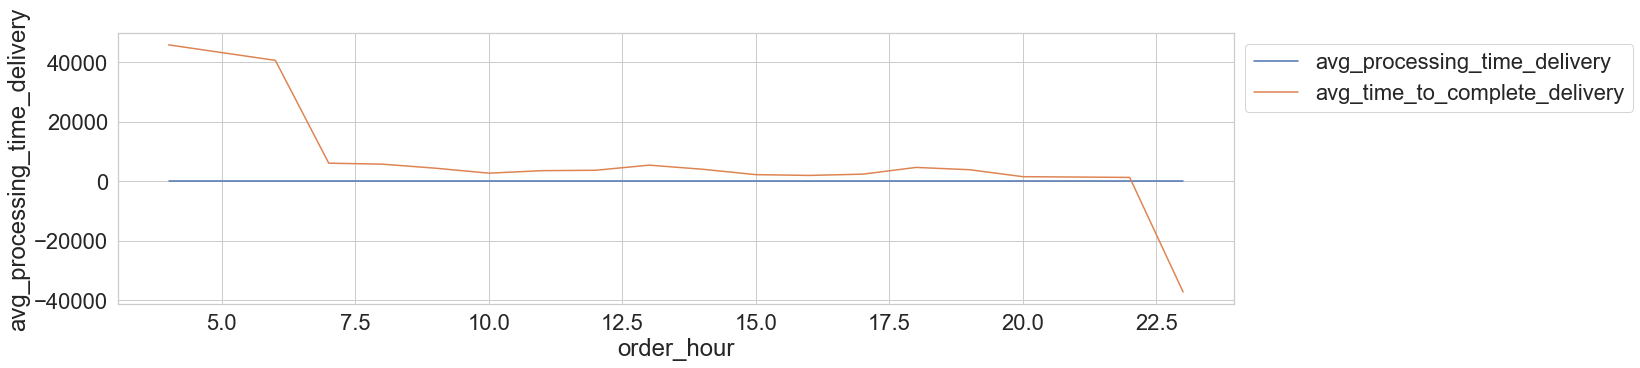

In [6]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=avg_time_all, x="order_hour", y="avg_processing_time_delivery", legend='brief')
sns.lineplot(data=avg_time_all, x="order_hour", y="avg_time_to_complete_delivery", legend='brief')
plt.legend(labels=["avg_processing_time_delivery","avg_time_to_complete_delivery"], loc = 2, bbox_to_anchor = (1,1))
print (' ')


__На графике не видны закономерности из-за выбросов утром и вечером.<br/>
Уберу с графика заказы раньше 08:00 и позже 23:00:__


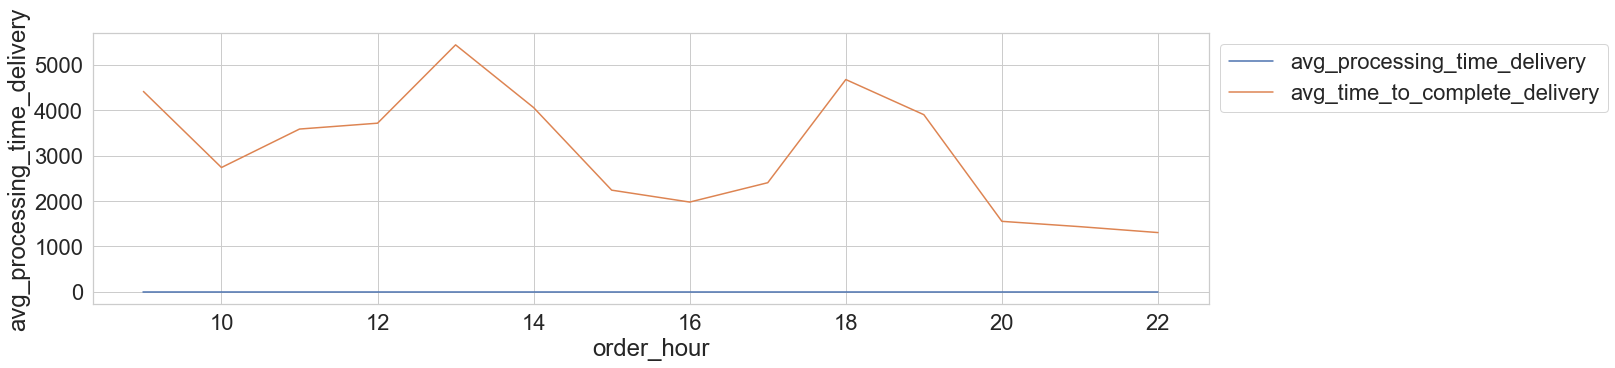

In [7]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=avg_time_all.query("order_hour > 8 and order_hour < 23"), x="order_hour", y="avg_processing_time_delivery", legend='brief')
sns.lineplot(data=avg_time_all.query("order_hour > 8 and order_hour < 23"), x="order_hour", y="avg_time_to_complete_delivery", legend='brief')
plt.legend(labels=["avg_processing_time_delivery","avg_time_to_complete_delivery"], loc = 2, bbox_to_anchor = (1,1))

__Вот так гораздо лучше. Видно на графике что есть два пика по времени удовлетворении запроса клиента (выдаче заказа).<br/>
Но цифры эти большие. Не бьются с цифрами выдачи в Ресторане. А кухня то у них одна, как я понимаю. <br/>
    Утром есть заказы, например, был оформлен в 04:54, а выдан курьеру аж через 12 часов 45 минут. И вообще в целом время до выдачи очень большое.<br/>
    <br/>
    На этих данных у меня возникла такая гипотеза:<br/>
    Врядли сотрудники пиццерии профакапили эти утренние заказы, а вспомнили про них только вечером. <br/>
    Поэтому я думаю что какая-то часть клиентов заказывает не с опцией "как можно скорее", а с опцией "к определенному времени".<br/>
    <br/>
    Если да, тогда заказ идет на кухню не сразу после подтверждения. И значит стравнивать эти заказы с ресторанными будет неправильным. <br/>__
    <br/>
    <br/>
### Перехожу к анализу заказов в ресторане.
__Вывожу рядом друг с другом график нагрузки на ресторан и график среднего времени до выдачи: <br/>__

 
 
 
Таблица нагрузки. Количество заказов по часам дня


,order_hour,resaurant_orders
15,4,0
16,6,0
17,7,0
0,8,6
1,9,25
2,10,44
3,11,46
4,12,65
5,13,46
6,14,49


 
 
 
Таблица производительности. Среднее время приема заказа и среднее время до получения заказа.


,order_hour,avg_processing_time_restaurant,avg_time_to_complete_restaurant
0,4,0,0
1,6,0,0
2,7,0,0
3,8,18,148
4,9,40,394
5,10,36,696
6,11,36,873
7,12,27,865
8,13,34,836
9,14,28,747


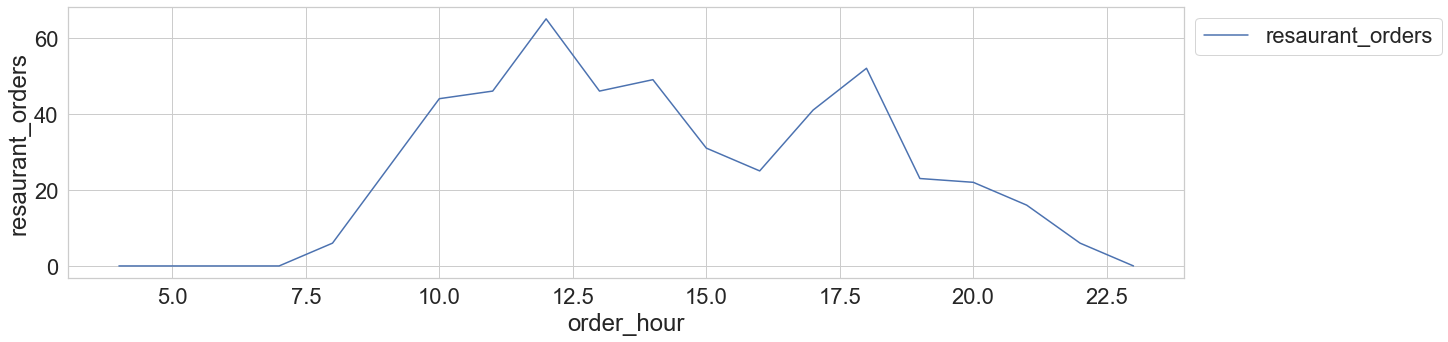

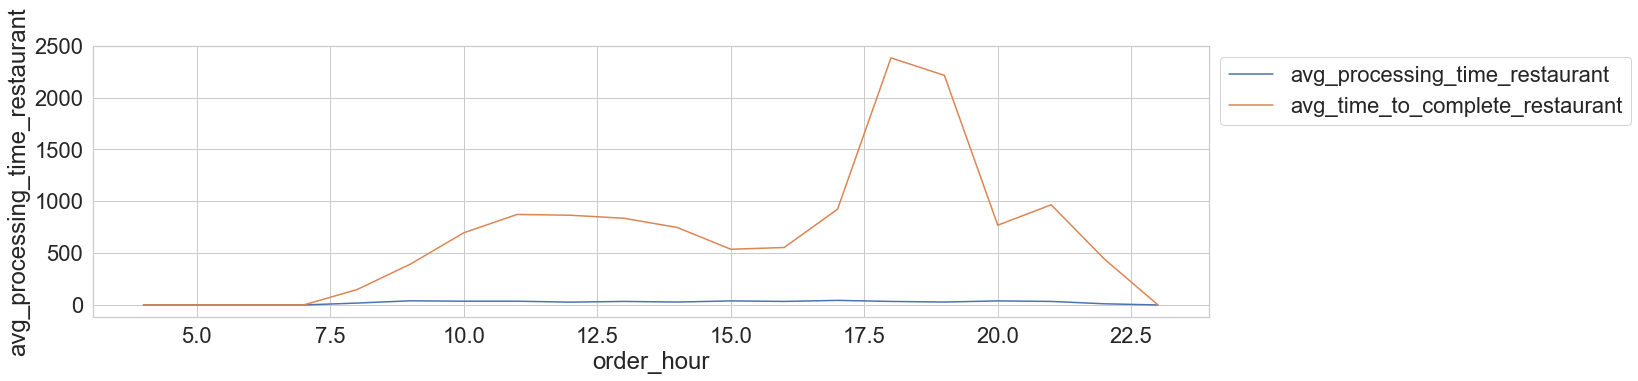

In [8]:
print (' ')
print (' ')
print (' ')
print ('Таблица нагрузки. Количество заказов по часам дня')
display(volume_all_orders[['order_hour','resaurant_orders']].sort_values(by='order_hour', ascending=True))
print (' ')
print (' ')
print (' ')
print ('Таблица производительности. Среднее время приема заказа и среднее время до получения заказа.')
display(avg_time_all[['order_hour','avg_processing_time_restaurant','avg_time_to_complete_restaurant']].sort_values(by='order_hour', ascending=True))
plt.figure(figsize=(20, 5))
sns.lineplot(data=volume_all_orders, x="order_hour", y="resaurant_orders")
plt.legend(labels=["resaurant_orders"], loc = 2, bbox_to_anchor = (1,1))
print (' ')
plt.figure(figsize=(20, 5))
sns.lineplot(data=avg_time_all, x="order_hour", y="avg_processing_time_restaurant", legend='brief')
sns.lineplot(data=avg_time_all, x="order_hour", y="avg_time_to_complete_restaurant", legend='brief')
plt.legend(labels=["avg_processing_time_restaurant","avg_time_to_complete_restaurant"], loc = 2, bbox_to_anchor = (1,1))




__В графике нагрузки видно что есть два пиковых промежутка, когда больше всего заказов:<br/>__
1. __это с 12:00 до 13:00 (время обеденных перерывов)<br/>__
1. __это с 18:00 до 19:00 (время ужинов, когда заканчивается рабочий день)<br/>__
__Причем по нагрузке эти пиковые часы сопоставимы: <br/>__
1. __с 12:00 до 13:00 поступило 65 заказов,<br/>__
1. __с 18:00 до 19:00 поступило 52 заказа.<br/>__

__Но почему-то вечером клиенты ждали свои заказы в среднем 2383 секунды (почти 40 минут). А в обед среднее время до выдачи было 865 секунд (чуть меньше 15 минут)<br/>
На это есть какая-то причина.__

### Беру лопату, копаю дальше.

__Сегодня специально сходил в пиццерию "ДоДо Пицца" в Казани в ТЦ "Южный". Пообщался с девушкой на кассе, посмотрел меню и заглянул в дальние уголки заведения по ту сторону прилавка.<br/>
Выяснил что в составе системы массового обслуживания "Пиццерия" есть еще как минимум две системы массового обслуживания:<br/>__
1. __Печь для выпечки пиццы,__
1. __Салатный цех.__

__Смотрю еще раз на датасет - пока не вижу - есть ли в пиццерии этого датасета салатный цех. Может быть, его и нет. Но печь точно есть.<br/>
Буду выяснять - как различается время выдачи в зависимости от присутствия в заказе выпекаемой продукции:__

In [9]:
resaurant_have_bakes = intro_data\
.query("ordertype == 'Restaurant' and isbaked == 1")\
.drop_duplicates(subset=['orderid'])
#display(resaurant_have_bakes)
volume_resaurant_have_bakes = resaurant_have_bakes\
.groupby('order_hour', as_index=False) \
.agg({'orderid': 'count'})
volume_resaurant_have_bakes.rename(columns={'orderid':'resaurant_have_bakes'}, inplace=True)
#display(volume_resaurant_have_bakes)

resaurant_have_not_bakes = intro_data\
.query("ordertype == 'Restaurant' and isbaked == 0 and orderid not in @resaurant_have_bakes.orderid")\
.drop_duplicates(subset=['orderid'])
#display(resaurant_have_not_bakes)
volume_resaurant_have_not_bakes = resaurant_have_not_bakes\
.groupby('order_hour', as_index=False) \
.agg({'orderid': 'count'})
volume_resaurant_have_not_bakes.rename(columns={'orderid':'resaurant_have_not_bakes'}, inplace=True)
#display(volume_resaurant_have_not_bakes)


volume_all_orders_by_bakes = volume_resaurant_have_bakes.merge(volume_resaurant_have_not_bakes[['order_hour','resaurant_have_not_bakes']], how='outer', on=['order_hour'])
volume_all_orders_by_bakes = volume_all_orders_by_bakes.fillna(0).astype('int64', errors='raise').sort_values(by='order_hour', ascending=True)
volume_all_orders_by_bakes['total_resaurant_orders'] = volume_all_orders_by_bakes['resaurant_have_bakes'] + volume_all_orders_by_bakes['resaurant_have_not_bakes']
# display(volume_all_orders_by_bakes.sort_values(by='order_hour', ascending=True))

# plt.figure(figsize=(20, 5))
# sns.lineplot(data=volume_all_orders_by_bakes, x="order_hour", y="resaurant_have_bakes")
# sns.lineplot(data=volume_all_orders_by_bakes, x="order_hour", y="resaurant_have_not_bakes")
# sns.lineplot(data=volume_all_orders_by_bakes, x="order_hour", y="total_resaurant_orders")
# plt.legend(labels=["resaurant_have_bakes","resaurant_have_not_bakes","total_resaurant_orders"], loc = 2, bbox_to_anchor = (1,1))

 
 
 
Таблица нагрузки. Количество заказов по часам дня: заказы с выпекаемым товаром, заказы без выпекаемых товаров и общее количество


,order_hour,resaurant_have_bakes,resaurant_have_not_bakes,total_resaurant_orders
14,8,0,6,6
0,9,16,9,25
1,10,26,18,44
2,11,30,16,46
3,12,46,19,65
4,13,35,11,46
5,14,30,19,49
6,15,22,9,31
7,16,18,7,25
8,17,27,14,41


 
 
 
Таблица производительности. Среднее время приема заказа и среднее время до получения заказа. С разбивкой по наличию или отсутствию выпекаемого продукта.


,order_hour,avg_processing_time_restaurant_have_bakes,avg_time_to_complete_restaurant_have_bakes,avg_processing_time_restaurant_have_not_bakes,avg_time_to_complete_restaurant_have_not_bakes
14,8,0,0,18,148
0,9,49,558,23,102
1,10,48,1049,18,186
2,11,45,1197,19,264
3,12,32,1178,13,107
4,13,35,1059,28,128
5,14,32,1136,23,133
6,15,49,732,14,61
7,16,41,737,17,82
8,17,60,1340,13,121


 
 
 
График нагрузки. Количество заказов по часам дня: заказы с выпекаемым товаром, заказы без выпекаемых товаров и общее количество


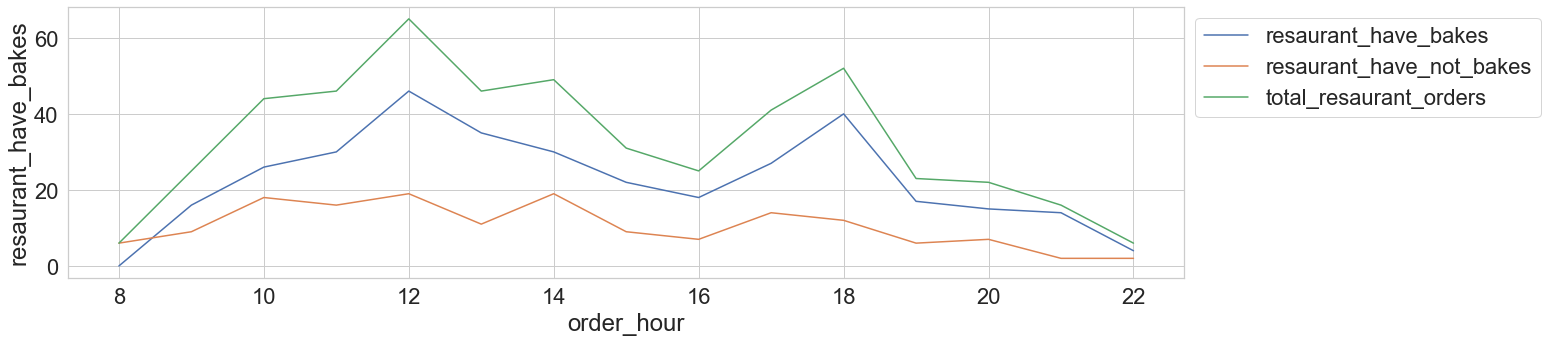

In [10]:
avg_time_restaurant_have_bakes = resaurant_have_bakes\
    .groupby(['orderid','order_hour'], as_index=False) \
    .agg({'processing_time': 'max','time_to_complete': 'max'})\
    .groupby('order_hour', as_index=False) \
    .agg({'processing_time': 'mean','time_to_complete': 'mean'})
avg_time_restaurant_have_bakes['processing_time'] = round(avg_time_restaurant_have_bakes.processing_time.dt.total_seconds())
avg_time_restaurant_have_bakes['time_to_complete'] = round(avg_time_restaurant_have_bakes.time_to_complete.dt.total_seconds())
avg_time_restaurant_have_bakes.rename(columns={'processing_time':'avg_processing_time_restaurant_have_bakes'}, inplace=True)
avg_time_restaurant_have_bakes.rename(columns={'time_to_complete':'avg_time_to_complete_restaurant_have_bakes'}, inplace=True)
# display(avg_time_restaurant_have_bakes)

avg_time_restaurant_have_not_bakes = resaurant_have_not_bakes\
    .groupby(['orderid','order_hour'], as_index=False) \
    .agg({'processing_time': 'max','time_to_complete': 'max'})\
    .groupby('order_hour', as_index=False) \
    .agg({'processing_time': 'mean','time_to_complete': 'mean'})
avg_time_restaurant_have_not_bakes['processing_time'] = round(avg_time_restaurant_have_not_bakes.processing_time.dt.total_seconds())
avg_time_restaurant_have_not_bakes['time_to_complete'] = round(avg_time_restaurant_have_not_bakes.time_to_complete.dt.total_seconds())
avg_time_restaurant_have_not_bakes.rename(columns={'processing_time':'avg_processing_time_restaurant_have_not_bakes'}, inplace=True)
avg_time_restaurant_have_not_bakes.rename(columns={'time_to_complete':'avg_time_to_complete_restaurant_have_not_bakes'}, inplace=True)
# display(avg_time_restaurant_have_not_bakes)

avg_time_restaurant_by_bakes = avg_time_restaurant_have_bakes.merge(avg_time_restaurant_have_not_bakes[['order_hour','avg_processing_time_restaurant_have_not_bakes','avg_time_to_complete_restaurant_have_not_bakes']], how='outer', on=['order_hour'])
avg_time_restaurant_by_bakes = avg_time_restaurant_by_bakes.fillna(0).astype('int64', errors='raise')
print (' ')
print (' ')
print (' ')
print ('Таблица нагрузки. Количество заказов по часам дня: заказы с выпекаемым товаром, заказы без выпекаемых товаров и общее количество')
display(volume_all_orders_by_bakes.sort_values(by='order_hour', ascending=True))
print (' ')
print (' ')
print (' ')
print ('Таблица производительности. Среднее время приема заказа и среднее время до получения заказа. С разбивкой по наличию или отсутствию выпекаемого продукта.')
display(avg_time_restaurant_by_bakes.sort_values(by='order_hour', ascending=True))
print (' ')
print (' ')
print (' ')
print ('График нагрузки. Количество заказов по часам дня: заказы с выпекаемым товаром, заказы без выпекаемых товаров и общее количество')
plt.figure(figsize=(20, 5))
sns.lineplot(data=volume_all_orders_by_bakes, x="order_hour", y="resaurant_have_bakes")
sns.lineplot(data=volume_all_orders_by_bakes, x="order_hour", y="resaurant_have_not_bakes")
sns.lineplot(data=volume_all_orders_by_bakes, x="order_hour", y="total_resaurant_orders")
plt.legend(labels=["resaurant_have_bakes","resaurant_have_not_bakes","total_resaurant_orders"], loc = 2, bbox_to_anchor = (1,1))

 
График производительности. Среднее время приема заказа и среднее время до получения заказа. С разбивкой по наличию или отсутствию выпекаемого продукта.


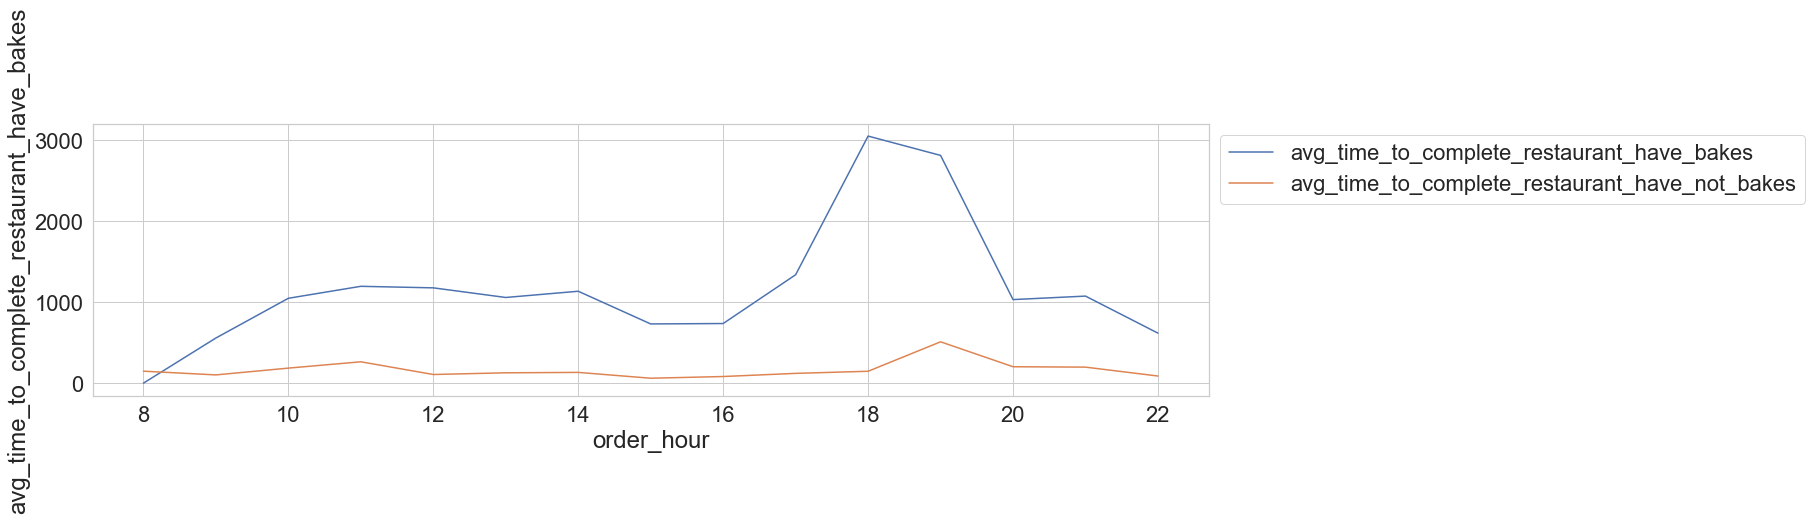

In [11]:
print (' ')
print ('График производительности. Среднее время приема заказа и среднее время до получения заказа. С разбивкой по наличию или отсутствию выпекаемого продукта.')
plt.figure(figsize=(20, 5))
sns.lineplot(data=avg_time_restaurant_by_bakes, x="order_hour", y="avg_time_to_complete_restaurant_have_bakes")
sns.lineplot(data=avg_time_restaurant_by_bakes, x="order_hour", y="avg_time_to_complete_restaurant_have_not_bakes")
plt.legend(labels=["avg_time_to_complete_restaurant_have_bakes","avg_time_to_complete_restaurant_have_not_bakes"], loc = 2, bbox_to_anchor = (1,1))

### Новые результаты дают новые инсайты:
__Цифры в таблицах и графики показывают нам что нагрузка (количество заказов) возрастает в те же самые часы. <br/>
Если бы эти графики смотрел ведущий с канала РБК, то он выразился бы примерно так: "Печь в нашей пиццерии нащупала линию сопротивления в 1200 секунд. И время выдачи заказа не превышает это значение"<br/>
И действительно. В обеденное время нагрузка возрастала, но заказы выдавались в нормальном режиме.<br/>
А вот с 17:00 до 18:00 произошел "прокол линии сопротивления". А затем с 18:00 до 19:00 началась "паника на рынках", "инвесторы начали скупать выпечку". <br/>
Причем объем торгов на "нашей бирже" (в ресторане) не возрос. Объем заказов с 18:00 до 19:00 даже на 13% меньше, чем в обед. То есть, оно НЕ возросло в несколько раз.<br/>
Это может означать: В Нью-Йорке наступил рабочий день, открылась Нью-Йоркская биржа и потащила котировки вверх.<br/>
<br/>
К чему эта аналогия?<br/>
Данные говорят, что скорее всего, возрасла загрузка печи по причине большого объема заказов выпечки на доставку. <br/>
Предыдущий мой анализ показал что там время выдачи заказа курьеру какое-то неадекватное. И данные по доставкам требуют обогащения. <br/>
Чего происходит в доставке я по данному датасету узнать не смог. О чем писал выше и напишу ниже в выводах.<br/>
<br/>
Поскольку подтвердить эту версию данным не представляется возможным, тогда не исключена и какая-то другая возможная причина - поломка печи, например.__
<br/>
<br/>
## Теперь посмотрю как дела с повторными покупками клиентов
__<br/>
<br/>
Найду клиентов, которых мы идентифицировали, и которые сделали больше одного заказа.__<br/>
__Посмотрю сколько данных и есть ли смысл делать детальный анализ.__

In [12]:
resaurant_have_bakes_ce = intro_data\
.query("clientid != 0")\
.drop_duplicates(subset=['orderid'])
# display(resaurant_have_bakes_ce)
resaurant_have_bakes_cx = resaurant_have_bakes_ce\
.groupby(['clientid','orderid'], as_index=False)\
.agg({'processing_start': 'max','time_to_complete':'max'})
resaurant_have_bakes_cx['processing_start_min'] = resaurant_have_bakes_cx['processing_start']
resaurant_have_bakes_cx['time_to_complete_min'] = resaurant_have_bakes_cx['time_to_complete']
resaurant_have_bakes_cx.rename(columns={'processing_start':'processing_start_max'}, inplace=True)
resaurant_have_bakes_cx.rename(columns={'time_to_complete':'time_to_complete_max'}, inplace=True)
resaurant_have_bakes_cx = resaurant_have_bakes_cx\
.groupby(['clientid'], as_index=False)\
.agg({'orderid': 'count','processing_start_max':'max','time_to_complete_max':'max','processing_start_min':'min','time_to_complete_min':'min'})\
.query("orderid >  1")
display(resaurant_have_bakes_cx.sort_values(by='clientid', ascending=True))

,clientid,orderid,processing_start_max,time_to_complete_max,processing_start_min,time_to_complete_min
131,4928017,2,2022-02-02 12:36:47,0 days 01:32:03,2022-02-02 12:35:38,0 days 01:30:57
164,9385692,2,2022-02-02 11:41:04,0 days 00:51:15,2022-02-02 11:24:56,0 days 00:12:10
188,11552287,2,2022-02-02 12:20:16,0 days 02:31:10,2022-02-02 10:53:53,0 days 00:59:26
268,23612117,2,2022-02-02 11:58:04,0 days 00:21:01,2022-02-02 11:57:08,0 days 00:05:23
325,28941958,2,2022-02-02 14:43:02,0 days 04:20:30,2022-02-02 13:50:45,0 days 03:25:50
352,32371307,2,2022-02-02 23:51:29,-1 days +00:12:27,2022-02-02 23:48:06,-1 days +00:09:04
422,41451534,3,2022-02-02 13:06:50,0 days 00:18:58,2022-02-02 10:51:08,0 days 00:02:41
449,44364464,4,2022-02-02 15:53:16,0 days 00:51:10,2022-02-02 15:46:15,0 days 00:44:20


__Я нашел всего 8 клиентов, которые сделали больше одного заказа в течение этого дня.<br/> 
Чего-то интересного в этих покупках я не вижу.<br/> 
Кроме вот чего:<br/>
Получается что Ресторан работает с 8 утра до 23-х вечера.<br/>
И кто-то даже делает заказы с опцией "в Ресторане" в эти часы.<br/>
Большинство населения у нас принимает пищу как минимум 3 раза в день. Это обычно до 9 утра, примерно в 12 дня и после 18 вечера.<br/>
И данные датасета у нас показывают что есть пиковые часы, когда много заказов. Это как раз 12 и 18 часов.<br/>
Но почему-то нет таких клиентов, которые бы приходили в эту пиццерию удовлетворить свою потребность поесть, хотябы 2 раза в день в указанные часы.<br/>
Данные говорят что все клиенты в этот день были какие-то одноразовые. Импульсный, случайный выбор места где поесть.<br/>
Речь идет о тех клиентах, которые как-то авторизовались при заказе: предьявили бонусную, дисконтную карту, карту лояльности, по номеру телефона.<br/>__
<br/>
__По тем заказам, где нет clientid, трудно делать какие-то выводы.__ 
<br/>
<br/>
__На этом шаге я рассчитывал еще раз использовать вот этот график:__

 
График производительности. Среднее время приема заказа и среднее время до получения заказа. С разбивкой по наличию или отсутствию выпекаемого продукта.


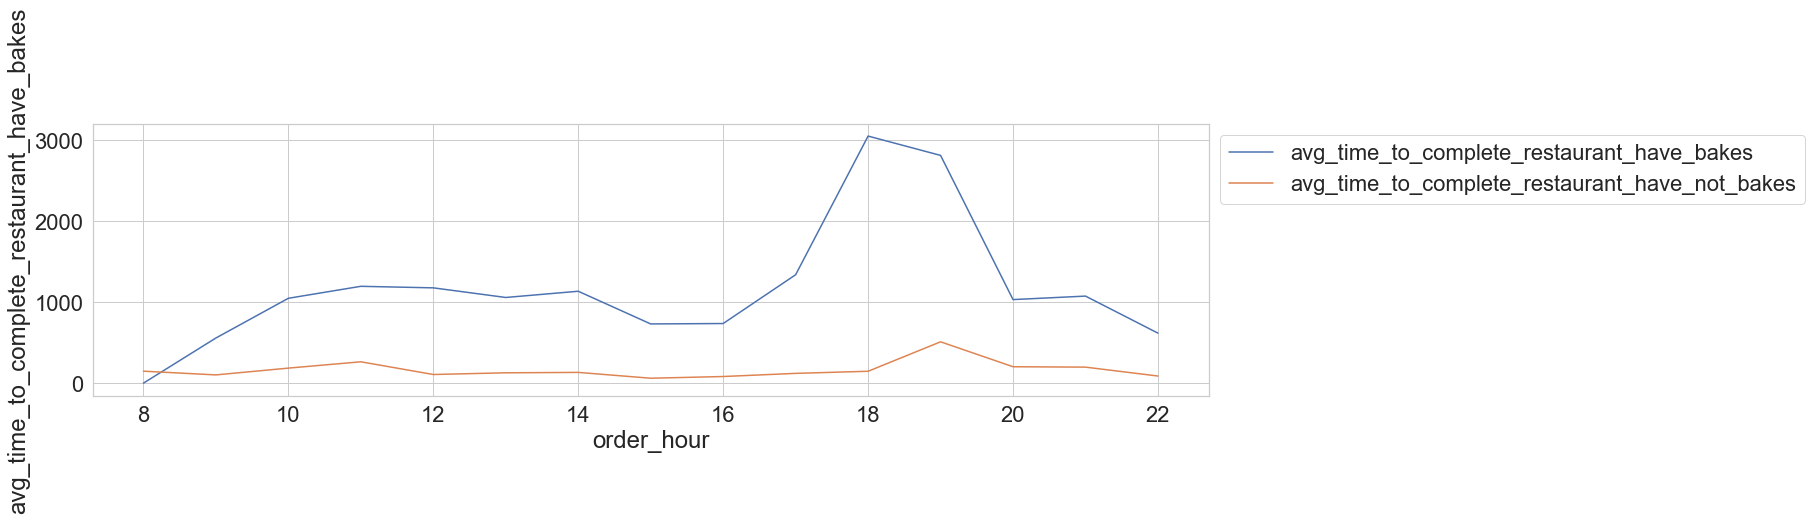

In [13]:
print (' ')
print ('График производительности. Среднее время приема заказа и среднее время до получения заказа. С разбивкой по наличию или отсутствию выпекаемого продукта.')
plt.figure(figsize=(20, 5))
sns.lineplot(data=avg_time_restaurant_by_bakes, x="order_hour", y="avg_time_to_complete_restaurant_have_bakes")
sns.lineplot(data=avg_time_restaurant_by_bakes, x="order_hour", y="avg_time_to_complete_restaurant_have_not_bakes")
plt.legend(labels=["avg_time_to_complete_restaurant_have_bakes","avg_time_to_complete_restaurant_have_not_bakes"], loc = 2, bbox_to_anchor = (1,1))

__Я рассчитывал что найдутся такие клиенты, которые приходили в пиццерию в обед и ждали свой заказ в пределах 1200 секунд (20 минут).<br/>
А затем эти же клиенты пришли вечером и прождали свои заказы уже 3000 секунд (50 минут). И эти клиенты ушли менее удовлетворенными и менее лояльными компании.<br/>
И здесь бы я привел в пример Макдоналдс. В таких случаях его обычно и приводят.<br/>
В котором в любое время дня и ночи ты приходишь, и примерно через одно и то же время ожидания получаешь свой заказ.<br/>
Причем это не зависит ни от города, ни даже от страны.<br/>
Так завоевывается лояльность клиента: когда бы и где ты не пришел в Мак, ты каждый раз получаешь одинаковый внешний вид, одинаковый вкус, одинаковое время ожидания, одинаково бодрый услужливый персонал.<br/>
<br/>
Но показать этого не довелось в виду отсутствия данных о подобных случаях.__

# Выводы:
## Чтобы делать качественную аналитику, связанную с лояльностью, предлагаю собирать больше данных:
1. В таблице есть заказы, в которых отрицательная длительность выдачи клиенту. Время подтверждения заказа у них 23 с чем-то. Думаю, это ошибка выгрузки. Заказ был выдан уже на следующие сутки. и выгрузилось время следующих суток, но обрезалась дата.  
1. Надо авторизовывать больше клиентов. Половина клиентов неавторизована. Полезность собранных данных существенно снижается.
1. Хочется сматчить номера заказов и идентификаторы сотрудников, принимавших заказ. А также идентификаторы поваров. Есть желание посчитать среднее время обработки заказа по сотрудникам и сравнить между сотрудниками. 
    1. Выяснить кто принимает заказы всреднем дольше других. Провести обучение отстающим.
    1. Выяснить кто из поваров обрабатывает заказы всреднем дольше других. провести обучение отстающим. 
1. Для заказов в ресторане есть время начала приема заказа, есть время окончания. Это ОК. Для заказов на доставку - время совпадает. Тут, наверное, есть варианты: 
    1. Если это заказы с нашего сайта или приложения, тогда я предлагаю начать логировать время самообслуживания. К примеру, с момента когда клиент положил первый товар в корзину, до подтверждения заказа. 
    1. Если это заказы с агрегаторов типа Яндекс еды, тогда узнать, вдруг это можно выгрузить. Эти данные помогут улучшить, упростить, ускорить заказ. И, как следствие, лояльность. 
1. По заказам с доставкой недостаточно данных. 
    1. Не хватает данных по каждому заказу: сколько времени ушло у клиента от начала заказа до подтверждения,
    1. Удовлетворение клиента наступает когда он получает на руки заказ. А не когда заказ передается курьеру. Поэтому эти данные тоже нужны для корректного расчета, создания дашборда и т. д. 
    1. И для заказов с доставкой я бы добавил следующие столбцы:
        1. Опция доставки "как можно скорее"/"к определенному времени",
        1. К какому времени нужна доставка,
        1. Время получения заказа на руки клиентом,
        1. Время отправки на кухню. Для заказов в ресторане можно условиться, что после подтвержения он сразу идет на кухню. Для отсроченных заказов получается нет данных когда он перешел на кухню. После находок, что были выше, мне очень хочется посчитать нагрузку на кухню по часам.
1. Если смотреть на данные, то кажется, что при заказе с опцией "В Ресторане" тоже возможна опция "к определенному времени". В таком случае, данные этих заказов также нужно обогащать, как и данные заказов с доставкой:
    1. Для заказов с доставкой я бы добавил следующие столбцы:
        1. Опция для Ресторана "как можно скорее"/"к определенному времени",
        1. К какому времени нужен заказ,
        1. Время отправки на кухню.


## Предложения по улучшению лояльности клиентов:
1. Нужно управлять временем получения заказа клиентом:
    1. Минимизировать задержки выдачи, оптимизировать производство под быструю выдачу заказов,
    1. Внедрить систему управления ожиданиями. То есть, если на кухне перегрузка, то прогнозировать время получения заказа и озвучивать его клиенту. А дальше контролировать пунктуальность и точность соблюдения озвученных клиенту сроков. 
1. Есть поле для деятельности маркетологам: Будет неплохо если люди будут чаще приходить 2 или 3 раза в день: на завтрак, обед, и ужин.